## EDA New York City Airbnb Open Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import scipy.stats as ss
from scipy.stats import mannwhitneyu
from wordcloud import WordCloud
import geopandas as gpd
from shapely import wkt

**Информация про датасет**

Датасет New York City Airbnb Open Data  описывает активность и показатели объявлений на площадке  Airbnb в Нью-Йорке, штат Нью-Йорк, за 2019 год.
Датасет содержит около 49000 наблюдений с 16 столбцами и представляет собой смесь категориальных и числовых значений.

**Наименование и описание столбцов:**
- id - ID объявления
- name - Название объявления
- host_id - ID хозяина / организатора
-host_name - Наименование хозяина организатора
-neighbourhood_group -  Район Нью-Йорка
-neighbourhood - Микрорайон Нью-Йорка
-latitude - Координаты широты
-longitude - Координаты долготы
-room_type -Тип жилья
-price - Цена в долларах
-minimum_nights - Минимальное количество ночей, возможное для бронирования
-number_of_reviews - Количество отзывов
-last_review - Дата последнего отзыва
-reviews_per_month - Среднее количество отзывов в месяц
-callculated_host_listings_count - Число объявлений одного хозяина / организатора
-availability_365 -  Количество дней, в течение которых объявление доступно для бронирования



**Основные  цели исследования**
- Исследовать данные, выявить закономерности, визуализировать данные в виде графиков, на основе полученных результатов сделать выводы
- Провеcти  корреляционно регрессионный анализа данных и определить факторы, которые влияют на формировние цены на
  аренду жилья в Нью-Йорке
- По изученным данным выбрать для себя идеальный объект размещения в городе  Нью-Йорк по заданным критериям


In [3]:
df = pd.read_csv("AB_NYC_2019.csv")

In [4]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#Датасет содержит около 48895 наблюдений с 16 столбцами
df.shape

(48895, 16)

In [6]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
# Проверяем датасет на наличие отсутствующих значений.
# В столбцах last_review  и reviews_per_month отсутствует 10052 значений, что составляет 21% от общего числа
#данных. 
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#Удаляем столбцы last_review  и reviews_per_month, чтобы не искажать результаты исследований, удалим столбец
# name, так как он не представляет никакой роли для нашего анализа
df.drop(['name','last_review','reviews_per_month' ], axis = 1, inplace = True)

In [9]:
df.head(5)

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Атрибут «availability_365» означает количество дней, в течение которых объект доступен для бронирования. Это означает, что общее количество дней, в течение которых работает объект размещения в течение года. Здесь значение 0 означает размещение, которое не эксплуатировалось в течение одного года, поэтому такие строки мы будем отбрасывать и сбрасывать индекс

In [10]:
#В датасет 17533 объявлений, которые не были активны в течение 2019 года
df.availability_365.value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

In [11]:
#Удалим данные из датасета, 
#будем проводить анализ только по объявлениям, которые хотя бы 1 день были активны в течение 2019 года
df = df.drop(df[df['availability_365']==0].index,axis = 0)
df = df.reset_index()


In [12]:
# Итоговый набор данных состоит из  31362 наблюдений
len(df)

31362

In [13]:
df.nunique()

index                             31362
id                                31362
host_id                           21809
host_name                          8214
neighbourhood_group                   5
neighbourhood                       218
latitude                          16038
longitude                         13367
room_type                             3
price                               645
minimum_nights                       99
number_of_reviews                   388
calculated_host_listings_count       47
availability_365                    365
dtype: int64

In [14]:
#Повторяющиеся значения в Датасете отсутствуют
df.duplicated().sum()

0

**HOST_ID**

In [15]:
#Выведем ТОП 15 владельцев, которые разместили наибольшее число объявлений
top15_host = df.host_id.value_counts().head(15)
top15_host

219517861    327
107434423    232
30283594     121
12243051      96
137358866     92
16098958      92
61391963      86
22541573      85
200380610     65
1475015       52
7503643       50
120762452     50
205031545     49
2856748       49
190921808     47
Name: host_id, dtype: int64

In [16]:
top15_host = pd.DataFrame(top15_host)
top15_host.reset_index(inplace = True)
top15_host.rename(columns={'index':'host_id', 'host_id' :'count_listings'}, inplace = True)
top15_host

,host_id,count_listings
0,219517861,327
1,107434423,232
2,30283594,121
3,12243051,96
4,137358866,92
5,16098958,92
6,61391963,86
7,22541573,85
8,200380610,65
9,1475015,52


[Text(0, 0, '1475015'),
 Text(1, 0, '2856748'),
 Text(2, 0, '7503643'),
 Text(3, 0, '12243051'),
 Text(4, 0, '16098958'),
 Text(5, 0, '22541573'),
 Text(6, 0, '30283594'),
 Text(7, 0, '61391963'),
 Text(8, 0, '107434423'),
 Text(9, 0, '120762452'),
 Text(10, 0, '137358866'),
 Text(11, 0, '190921808'),
 Text(12, 0, '200380610'),
 Text(13, 0, '205031545'),
 Text(14, 0, '219517861')]

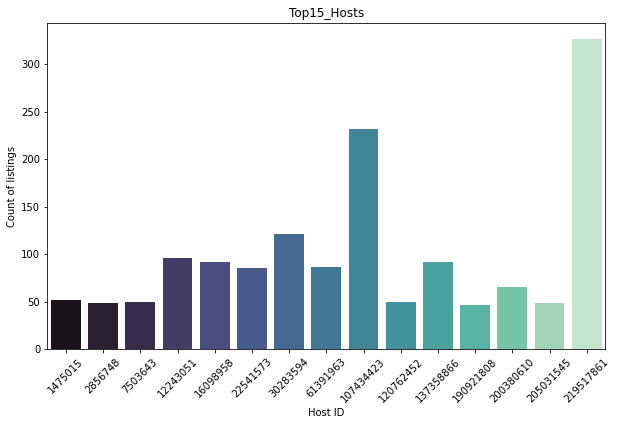

In [17]:
 #Отобразим на графике ТОП 15 владельцев с наибольшим числом объявлений
 plt.figure(figsize =(10,6))
 viz1 = sns.barplot(x= 'host_id', y = 'count_listings', data = top15_host, palette = 'mako')
 viz1.set_title('Top15_Hosts')
 viz1.set_ylabel('Count of listings')
 viz1.set_xlabel('Host ID')
 viz1.set_xticklabels(viz1.get_xticklabels(), rotation=45)

In [18]:
top6_host_id = [219517861,107434423,30283594,12243051,137358866,16098958]
for i in top6_host_id: 
    print(i,": ",df[df['host_id']==i]['host_name'].unique()[0])

219517861 :  Sonder (NYC)
107434423 :  Blueground
30283594 :  Kara
12243051 :  Sonder
137358866 :  Kazuya
16098958 :  Jeremy & Laura


In [19]:
df_1 = df[df['host_id'].isin(top6_host_id)][['host_id','neighbourhood_group', 'room_type']]
df_1.drop_duplicates(inplace = True)
df_1['neighbourhood_group'].value_counts()


Manhattan    9
Brooklyn     2
Queens       1
Name: neighbourhood_group, dtype: int64

In [20]:
df_1['room_type'].value_counts()

Entire home/apt    7
Private room       5
Name: room_type, dtype: int64

In [21]:
df.id.count()/df.host_id.nunique()

1.4380301710303085

 - В среднем на одного владельца 1,44 объявлений. Самое большое число объявлений 327 принадлежит владельцу Sonder (NYC). Это сеть отелей и апартаменто в Нью-Йорке, состоящая из 12 объектов для размещения.
 
   https://www.sonder.com/destinations/new_york_city/search?sleeps=1&neighborhood=all_neighborhoods&bedroom_count=0&bed_count=1&bathroom_count=1&utm_medium=cpc&utm_source=google&utm_term=sonder+rentals+nyc&utm_campaign=15996984601
 
- Владельцы, которые наиболее активно используют платформу Airbnb и предоставляют наибольшее количество предложений:
 Sonder(NYC), Blueground, Kara,Sonder, Kazuya,Jeremy & Laura.

- Самые активные пользователи предлагают размещение в трех райноах Нью-Йорка: Manhattan,Brooklyn, Queens
- Типы размещения: Entire home/apt, Private room 

**neighbourhood_group**

In [666]:
df.neighbourhood.nunique()

218

**room_type**

In [23]:
#Выведем все наименования типов размещения
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [24]:
room_type_share = df.room_type.value_counts(normalize = True)
room_type_share = pd.DataFrame(room_type_share)
room_type_share. reset_index(inplace = True)
room_type_share.rename(columns = {'index': 'room_type', 'room_type': 'share'},inplace = True)
room_type_share

,room_type,share
0,Entire home/apt,0.527167
1,Private room,0.445284
2,Shared room,0.027549


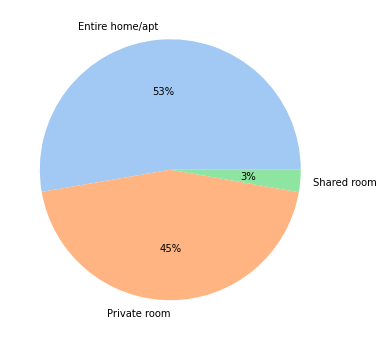

In [27]:
#Покажем на круговой диаграмме долю каждого типа размещения в объявлениях на платформе AIRBNB
plt.figure(figsize =(6,6))
colors = sns.color_palette('pastel')[0:5]
viz_4 = plt.pie(room_type_share.share, colors = colors, labels=room_type_share.room_type , autopct='%.0f%%')
plt.show()

Чаще всего для размещение на сервисе Airbnb предлагаются номера/комнаты типа  Entire home/apt - аренда целой квартиры, дома и private room - аренда отдельной комнаты, самым редким типом размещения является Shared room - аренда комнаты на несколько человек, всего 3% от общего числа объявлений

**neighbourhood_group**

In [28]:
#Выведем все наименования районов города Нью-Йорк
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [29]:
area_popularity = df.neighbourhood_group.value_counts().to_frame().reset_index()
area_popularity.rename(columns = {'index': 'neighbourhood_group', 'neighbourhood_group': 'count'},inplace = True)
area_popularity

,neighbourhood_group,count
0,Manhattan,13559
1,Brooklyn,12260
2,Queens,4298
3,Bronx,914
4,Staten Island,331


<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

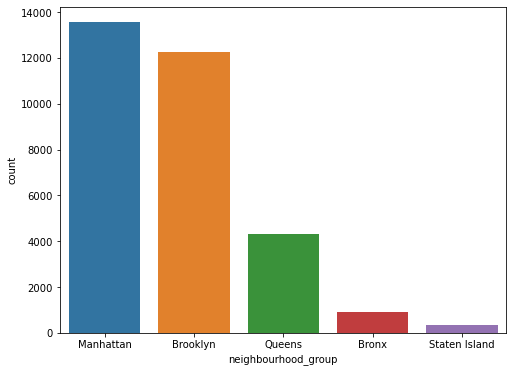

In [36]:
# Отобразим на графике самые популярные районы по кол-ву объявлений
plt.figure(figsize =(8,6))
sns.barplot(data = area_popularity , x ='neighbourhood_group',y ='count')

Самыми популярными районами являются Манхеттен и Бруклин, больше всего предложений по аренде жилья в этих районах. Меньше всего предложений по размещению в районе Стейтен-Айленд

**neighbourhood**

In [37]:
# Выведем кол-во микрорайонов в Нью-Йорке
df.neighbourhood.nunique()

218

ValueError: Only supported for TrueType fonts

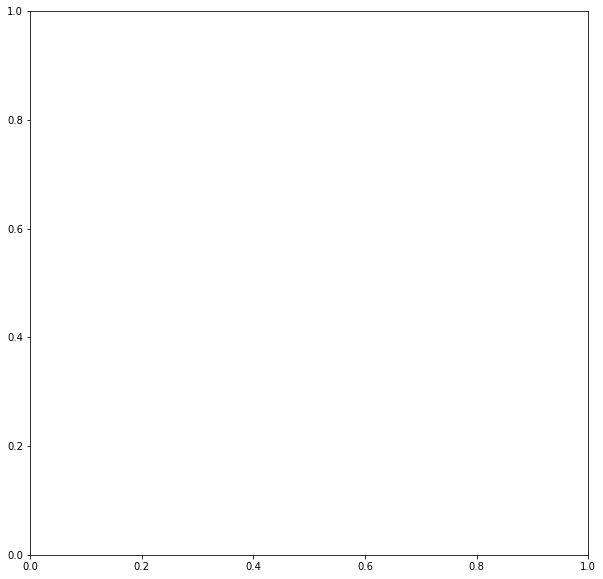

In [38]:
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white', width=1920,height=1080).generate(" ".join(df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Price**

In [39]:
df.price.describe()

count    31362.000000
mean       162.050475
std        254.425463
min          0.000000
25%         70.000000
50%        111.500000
75%        189.000000
max      10000.000000
Name: price, dtype: float64

Средняя цена за ночь в объявлениях airnbn составляет 162 долл, максимальная цена 10000  - это будет являться 
статистическим выбросом, так как медиана 111.5, а 75  процентиль 189. 
Наглядно выбросы можно увидеть на визуализации.


<AxesSubplot:xlabel='id', ylabel='price'>

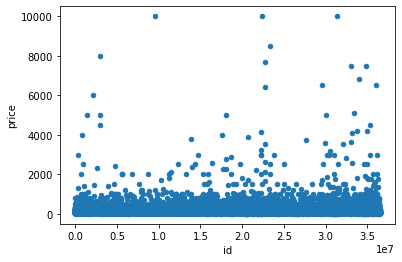

In [40]:
df.plot.scatter(x = 'id', y = 'price')

Для расчета средней цены аренды жилья без учета статистических выбросов удалим все значения цены, которые не попали в 99 персентиль, а также удалим цены с нулевыми значениями

In [41]:
q = df['price'].quantile(0.99)
q

823.1699999999983

In [42]:
mean_price = df[(df['price'] < q) & (df['price']>0)]
mean_price. price.describe()

count    31040.000000
mean       145.487146
std        113.849731
min         10.000000
25%         70.000000
50%        110.000000
75%        185.000000
max        822.000000
Name: price, dtype: float64

Исключив статисчиские выбросы, объявления с ценами более 823 долл за ночь, 
которые составляют всего 1% от общего числа объявлений и нулевые значения, получаем среднюю цену аренды жилья в Нью-йорк 145 долл за ночь

<AxesSubplot:>

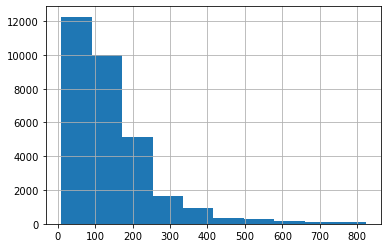

In [43]:
mean_price. price.hist()

На гистограмме представлено распределение цен, где очевидно, что на дорогие варианты размещения предложений на сервисе AIRBNB гораздо меньше и уменьшается с ростом цены на жилье. 
Посмотрим будет ли данное распределение цен одинаково для каждого района Нью-Йорк в отдельности

array([[<AxesSubplot:title={'center':'Bronx'}>,
        <AxesSubplot:title={'center':'Brooklyn'}>],
       [<AxesSubplot:title={'center':'Manhattan'}>,
        <AxesSubplot:title={'center':'Queens'}>],
       [<AxesSubplot:title={'center':'Staten Island'}>, <AxesSubplot:>]],
      dtype=object)

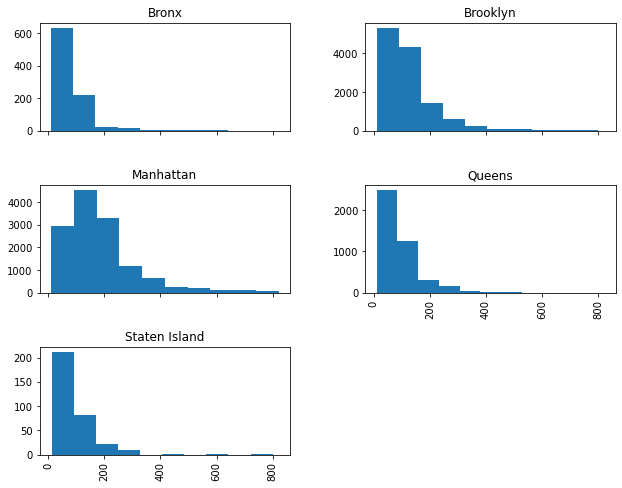

In [44]:
v = mean_price.hist(column = 'price', by = 'neighbourhood_group', grid = False, sharex = True, figsize = (10,8))
v

  На гистограммах видно, что цены в различных райнах Нью-Йорк распределены примерно одинаково, за исключение Манхэттен, в котором кол-во объявлений со средними ценами больше, чем объявлений с более дешевыми вариантами размещения.



Сгрупируем данные по районам Нью-Йорк и оценим стоимость аренда жилья в каждом из них, и поссмотрим наглядно распределение цен по районам с помощью графика boxplot 

In [45]:
area = mean_price[['neighbourhood_group','price' ]].reset_index() 
area_price = round(area.pivot_table(area, columns = 'neighbourhood_group', index = 'index').describe(),2)
area_price

price                                           
neighbourhood_group   Bronx  Brooklyn Manhattan   Queens Staten Island
count                911.00  12190.00  13326.00  4285.00        328.00
mean                  85.46    124.04    186.46    95.86         93.17
std                   73.56     95.62    128.26    71.78         77.32
min                   10.00     10.00     10.00    10.00         13.00
25%                   45.00     64.00     99.00    50.00         50.00
50%                   65.00     99.00    150.00    75.00         75.00
75%                  100.00    150.00    233.00   114.00        105.00
max                  800.00    800.00    822.00   750.00        800.00

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

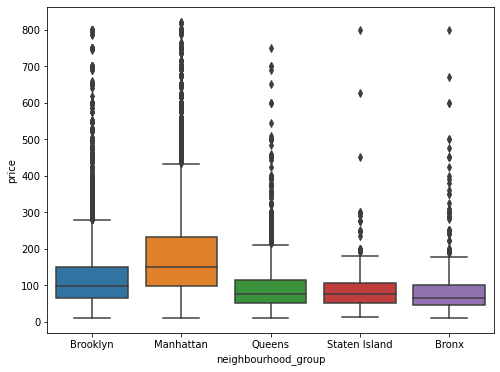

In [49]:
plt.figure(figsize =(8,6))
sns.boxplot(data= mean_price,x='neighbourhood_group',y='price')

На основе вышеприведенной таблицы и графика можем сделать следующие выводы:
 - Манхэттен имеет самый высокий диапозон цен со средней ценой 186 долларов за ночь
 - Следующий по ценовому диапазону Бруклин со средней ценой 124 доллара
 - В  Квинс и Стейтен-Айленд распределение цен сопоставимо и средняя цена за ночь 96 и 93 доллара соответственно
 - Бронкс - самый дешевый район
 

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

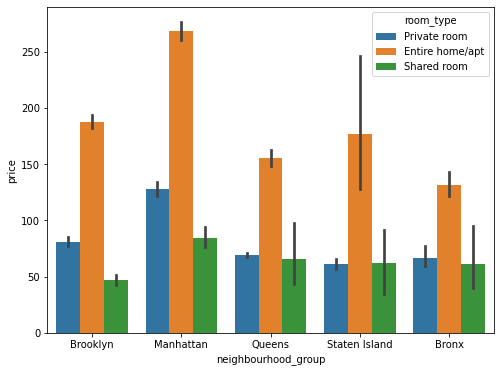

In [50]:
# Визуализируем распределение различных типов номеров в разном ценовом диапазоне по районам
plt.figure(figsize =(8,6))
sns.barplot(data = df, x = 'neighbourhood_group',y = 'price', hue = 'room_type')

Вне зависимости от района  размещения Entire home/apt является самым популярным в каждом районе. В районах с более высокими ценами на аренду жилья  Manhattan и Brooklyn наблюдаем преобладание типа аренды Private room над  Shared room, тогда как в остальных районах кол-во объявлений по этим типам размещения сопоставимо.

In [51]:
#Сгруппируем цену по 4 категориям в соответствии с ее значением процентиля в 25%, 50%, 75% и 
#найдем количество объявлений в каждой категории, разбив по районам
label_name = ['Budgetary','Average','Expensive','Luxary']
range = [0,70, 112, 189 ,np.inf]
df['price_range'] = pd.cut(df["price"],bins = range, labels = label_name)
price_group = df.groupby(['price_range','neighbourhood_group'])['price_range'].count()

print(price_group)

price_range  neighbourhood_group
Budgetary    Bronx                   492
             Brooklyn               3987
             Manhattan              1572
             Queens                 2085
             Staten Island           153
Average      Bronx                   257
             Brooklyn               3147
             Manhattan              2784
             Queens                 1124
             Staten Island           102
Expensive    Bronx                   113
             Brooklyn               3104
             Manhattan              3909
             Queens                  697
             Staten Island            45
Luxary       Bronx                    51
             Brooklyn               2015
             Manhattan              5294
             Queens                  392
             Staten Island            31
Name: price_range, dtype: int64


<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

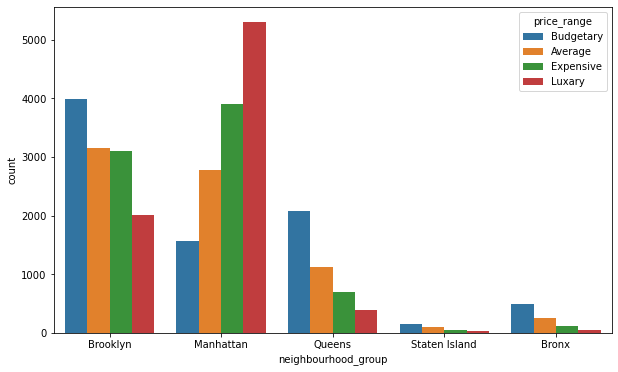

In [53]:
# Покажем распределение объявлений по группам Budgetary, Average, Expensive, Luxary на графике
plt.figure(figsize =(10,6))
sns.countplot(data = df, x='neighbourhood_group', hue = 'price_range')

По данному графику видно, что Манхэттен является самым дорогим районом, в данном районе объявлений на размещение в категории "Luxury" больше, чем в остальных районах. Показательно, что в отличие от других районов на Манхэттен объявлений категории "Luxury" больше, чем "Budgetary". 

В остальных районах Нью-Йорка сопоставимое распределение объявлений по ценовым категориям, больше всего бюджетных предложений и меньше всего дорогих вариантов дороже 189 долларов. 

Стоит отметь, что в Бруклине предложений в категориях цен "Average" и "Expensive" примерно одинаково.

**minimum_nights**

In [694]:
df.minimum_nights.describe()

count    31362.000000
mean         8.338658
std         23.836703
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

Среднее значение показателя minimum_nights (минимальное количество ночей, на которое можно арендовать объект)  составляет 8 дней, а 25-й процентиль, 50-й процентиль и 75-й процентиль составляют 2, 3, 5, следовательно, мы можем сделать вывод, что большинство значений находится в диапазоне от 2 до 5. 


/Users/dashalobik/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


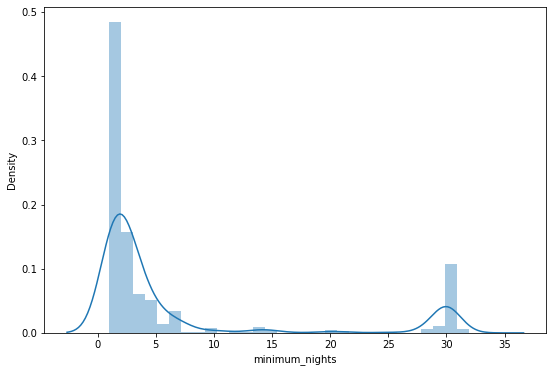

In [56]:
# Визуализируем показатель minimum_nights  с помощью графика displot
plt.figure(figsize =(9,6))
sns.distplot(df[(df['minimum_nights']< 35) & (df['minimum_nights'] > 0)]['minimum_nights'],bins = 31)
plt.show()

In [57]:
df[(df['minimum_nights'] > 28) & (df['minimum_nights'] < 32)].minimum_nights .count()

3939

In [58]:
df[(df['minimum_nights'] >= 2) & (df['minimum_nights'] <= 5)].minimum_nights .count()

16330

In [59]:
16330/31362*100

52.06938333014476

In [60]:
3939/31362*100

12.559785727951024

На графике видно, что действительно наибольшее число объявлений предлагают размещение минимум на 2-5 ночей 
(52% всех объявлений).
Также значительная часть объявлений (3939) предлагает размещение минимум на 1 месяц (от 28 до 32 дней), 
что составляет 12,56% всех объявлений


# Корреляционно регрессионый анализ

In [62]:
listings = df[['latitude', 'longitude','price', 'minimum_nights', 'number_of_reviews', 
       'calculated_host_listings_count', 'availability_365' ]]

In [63]:
listings.dtypes

latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [64]:
dummy = ['neighbourhood_group','neighbourhood','room_type' ]

In [65]:
dummy_list = []
for i in dummy:
  new_list = df[i].unique()
  dummy_list.append(new_list)

dummy_list


[array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
       dtype=object),
 array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'Murray Hill',
        "Hell's Kitchen", 'Chinatown', 'Upper West Side', 'South Slope',
        'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
        'East Harlem', 'Park Slope', 'Bedford-Stuyvesant',
        'Windsor Terrace', 'Inwood', 'East Village', 'Greenpoint',
        'Bushwick', 'Flatbush', 'Lower East Side',
        'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
        'SoHo', 'Upper East Side', 'Prospect Heights',
        'Washington Heights', 'Woodside', 'Brooklyn Heights',
        'Carroll Gardens', 'West Village', 'Gowanus', 'Flatlands',
        'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
        'Highbridge', 'Ridgewood', 'Morningside Heights', 'Jamaica',
        'Middle Village', 'NoHo', 'Ditmars Steinway', 'Cobble Hill',
        'Flatiron District', 'Roosevelt Island', 'Green

In [66]:
count = 0
for i in dummy:
    df[i+'_num'] = np.where(df[i] == dummy_list[count][0], 0, 1)
    count += 1

In [67]:
research_list = ['neighbourhood_group_num',
       'neighbourhood_num', 'latitude', 'longitude', 'room_type_num', 'price',
       'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365']

In [68]:
corr_m = df[research_list].corr()
corr_m

,neighbourhood_group_num,neighbourhood_num,latitude,longitude,room_type_num,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
neighbourhood_group_num,1.000000,0.071302,0.654375,0.015346,0.055329,0.091941,0.046212,-0.044099,0.146273,0.072826
neighbourhood_num,0.071302,1.000000,0.087702,0.029916,0.017557,0.014171,-0.005532,0.007624,0.011050,0.014397
latitude,0.654375,0.087702,1.000000,0.078610,-0.018535,0.033803,0.035607,-0.013481,0.025341,-0.003714
longitude,0.015346,0.029916,0.078610,1.000000,-0.183418,-0.158940,-0.081527,0.033989,-0.146085,0.027964
room_type_num,0.055329,0.017557,-0.018535,-0.183418,1.000000,0.239847,0.086602,-0.030725,0.134514,-0.013852
price,0.091941,0.014171,0.033803,-0.158940,0.239847,1.000000,0.039449,-0.072919,0.060828,0.074509
minimum_nights,0.046212,-0.005532,0.035607,-0.081527,0.086602,0.039449,1.000000,-0.116086,0.124207,0.125418
number_of_reviews,-0.044099,0.007624,-0.013481,0.033989,-0.030725,-0.072919,-0.116086,1.000000,-0.115415,0.009881
calculated_host_listings_count,0.146273,0.011050,0.025341,-0.146085,0.134514,0.060828,0.124207,-0.115415,1.000000,0.187949
availability_365,0.072826,0.014397,-0.003714,0.027964,-0.013852,0.074509,0.125418,0.009881,0.187949,1.000000


<AxesSubplot:>

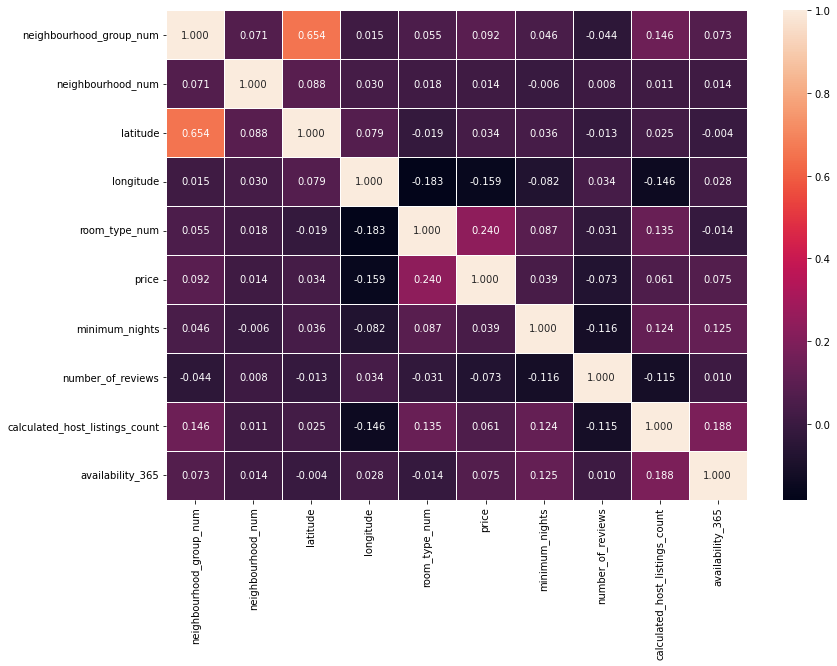

In [69]:
plt.figure(figsize = (13,9))
sns.heatmap(corr_m, annot = True, fmt = '.3f', linewidth = 1)

В большей степени с ценой связаны факторы room_type и longitude, однако коррелиция не значительная.

In [70]:

X = df[['neighbourhood_group_num',
       'neighbourhood_num', 'latitude', 'longitude', 'room_type_num',
       'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365']]
Y=df.price

In [71]:
X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     334.4
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        01:05:31   Log-Likelihood:            -2.1678e+05
No. Observations:               31362   AIC:                         4.336e+05
Df Residuals:                   31352   BIC:                         4.337e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Выводы**

Выбранная модель объясняет всего лишь 9 % дисперсии (окр. до целого). 
91% изменчивости цены сусществующая модель объяснить не может.

Для того чтобы, чтобы оценить влияние факторов на изменчивость цены, нам необходимы дополнительные факторы в наборе данных.На цену влияют следующие свойства объектов размещения:
- Площадь объекта (кол-во спален)
- Наличие балкона, террасы
- Вид из окна
- Наличие техники (кофе-машина, стиральная машина, холодильник, телевизор)
- Наличие инфраструктуры на территории (бассейн, спа, настольный теннис, внутренний двор, детская площадка)
- Наличие кухни 
- Возможность размещения с дрмашними животными




# ПОИСК ОБЪЕКТА РАЗМЕЩЕНИЯ НА AIRBNB

**На основе имеющихся данных подберем идеальный вариант размещения при посещении Нью-Йорка**
Мои критерии для поиска жилья:
1. Хочу проживать недалеко от Центрального Парка (растоянние до парка не больше 2 км)
2. Близость к станции метро
3. Стоимость жилья не дороже 145 долл. за ночь (средняя стоимость проживания по городу Нью-Йорк)
4. Остановится я планирую на 4 ночи
5. Кол-во отзывов должно быть больше 10
6. Проживать хочу в отдельной квартире/ доме

In [72]:
#Создаем Датафрейм с координатами Центарального Парка в Нью-Йорке
central_park = pd.DataFrame()
central_park['name'] = ["Central Park"]
central_park['longitude'] = -73.968285
central_park['latitude'] = 40.785091
central_park

,name,longitude,latitude
0,Central Park,-73.968285,40.785091


In [73]:
central_park = gpd.GeoDataFrame(central_park, geometry=gpd.points_from_xy(central_park.longitude, central_park.latitude))

In [74]:
# C сайта https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq
# скачиваем датасет с геоданными районов Нью-Йорка 
df_neighbourhood = pd.read_csv("nynta.csv")

In [75]:
df_neighbourhood

,the_geom,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.75205066516907 40.70522802...,4,Queens,81,QN08,St. Albans,45401.316803,7.741275e+07
1,MULTIPOLYGON (((-73.8870514253612 40.884349575...,2,Bronx,5,BX28,Van Cortlandt Village,21945.719299,2.566612e+07
2,MULTIPOLYGON (((-73.80576840191371 40.68293239...,4,Queens,81,QN55,South Ozone Park,36708.169305,8.246139e+07
3,MULTIPOLYGON (((-73.98017161103701 40.66115465...,3,Brooklyn,47,BK40,Windsor Terrace,19033.672066,1.404167e+07
4,MULTIPOLYGON (((-73.88833929256353 40.64671022...,3,Brooklyn,47,BK50,Canarsie,43703.609666,8.208968e+07
...,...,...,...,...,...,...,...,...
190,MULTIPOLYGON (((-73.90129277627032 40.82047544...,2,Bronx,5,BX34,Melrose South-Mott Haven North,19589.196431,1.727176e+07
191,MULTIPOLYGON (((-73.89680883223774 40.79580844...,2,Bronx,5,BX39,Mott Haven-Port Morris,35604.790810,4.189861e+07
192,MULTIPOLYGON (((-73.9119181232027 40.843257886...,2,Bronx,5,BX63,West Concourse,28571.879354,1.936642e+07
193,MULTIPOLYGON (((-74.072581339395 40.6379418745...,5,Staten Island,85,SI22,West New Brighton-New Brighton-St. George,66052.593065,5.602857e+07


In [76]:
# Колонку NTAName   переименуем в neighbourhood, а BoroName в neighbourhood_group
df_neighbourhood.rename(columns={'NTAName':'neighbourhood', 'BoroName':'neighbourhood_group'}, inplace=True)
df_neighbourhood.head(5)

,the_geom,BoroCode,neighbourhood_group,CountyFIPS,NTACode,neighbourhood,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.75205066516907 40.70522802...,4,Queens,81,QN08,St. Albans,45401.316803,7.741275e+07
1,MULTIPOLYGON (((-73.8870514253612 40.884349575...,2,Bronx,5,BX28,Van Cortlandt Village,21945.719299,2.566612e+07
2,MULTIPOLYGON (((-73.80576840191371 40.68293239...,4,Queens,81,QN55,South Ozone Park,36708.169305,8.246139e+07
3,MULTIPOLYGON (((-73.98017161103701 40.66115465...,3,Brooklyn,47,BK40,Windsor Terrace,19033.672066,1.404167e+07
4,MULTIPOLYGON (((-73.88833929256353 40.64671022...,3,Brooklyn,47,BK50,Canarsie,43703.609666,8.208968e+07


In [77]:
# Для того, чтобы отобразить данные из файла "nynta.csv" на карте преобразуем их. в формат wkt
#(текстовый формат описания геометрических фигур)  DataFrame  df_neighbourhood преобразуем в GeoDataFrame
df_neighbourhood['geom'] = df_neighbourhood['the_geom'].apply(wkt.loads)
df_neighbourhood = gpd.GeoDataFrame(df_neighbourhood, geometry='geom')

Text(0.5, 1.0, 'Central Park')

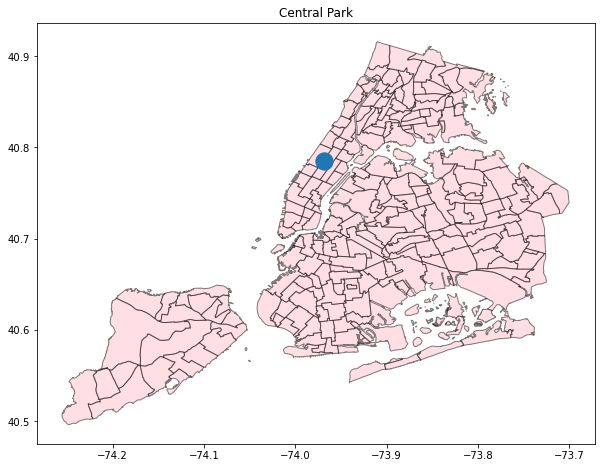

In [78]:
# Покажем на карте Нью-Йорка местоположение Центрального парка
fig,ax1 = plt.subplots(1,1, figsize=(10,10))
base = df_neighbourhood.plot(color='pink',alpha=0.5,edgecolor='black', ax=ax1)
central_park.plot(markersize=300,ax=base)
plt.title('Central Park')


In [79]:
# На карте видно, что центральный парк находится на Манхеттене
mnh_geo = df_neighbourhood[(df_neighbourhood['neighbourhood_group']== 'Manhattan')]


<AxesSubplot:>

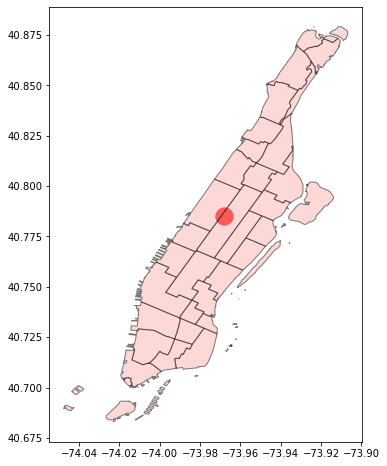

In [80]:
fig,ax = plt.subplots(1,1, figsize=(8,8))
central_park.plot(markersize=300,color='red',ax=ax)
mnh_geo.plot(column='neighbourhood_group',alpha=.5, ax=ax, cmap = 'Pastel1',edgecolor='black' )


In [81]:
#Загружаем датасет с геоданными станций метро Нью-Йорка
subways = pd.read_csv('DOITT_SUBWAY_STATION_01_13SEPT2010.csv')
subways.head(5)

,NAME,the_geom,URL,LINE
0,W 4th St - Washington Sq (Lower),POINT (-74.00030814706824 40.73225482650675),http://www.mta.info/nyct/subway/index.html,B-D-F-M
1,Buhre Ave,POINT (-73.83256899924748 40.846810332614844),http://www.mta.info/nyct/subway/index.html,6-6 Express
2,51st St,POINT (-73.97192000013308 40.757107333148234),http://www.mta.info/nyct/subway/index.html,4-6-6 Express
3,86th St,POINT (-73.97621799811347 40.78864433404891),http://www.mta.info/nyct/subway/index.html,1-2
4,Brooklyn Bridge - City Hall,POINT (-74.00413100111697 40.713065332984044),http://www.mta.info/nyct/subway/index.html,4-5-6-6 Express


In [82]:
subways['geom'] = subways['the_geom'].apply(wkt.loads)
subways = gpd.GeoDataFrame(subways, geometry='geom')

Text(0.5, 1.0, 'NYC Subway Stations and Central Park')

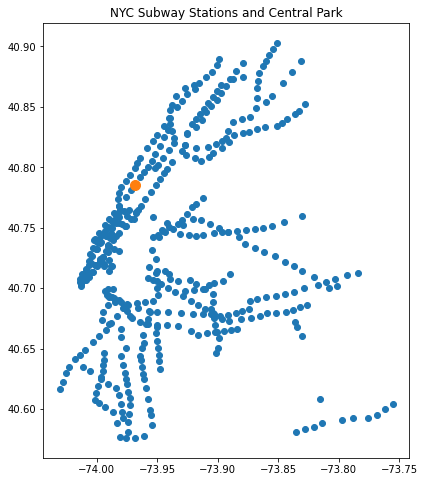

In [84]:
# Расположение Центрального Парка на карте станций метро
fig,ax = plt.subplots(1,1, figsize=(8,8))
subways.plot(ax=ax)
central_park.plot(markersize=100,ax=ax)
plt.title('NYC Subway Stations and Central Park', fontsize=12)

In [85]:
# Определим координаты площади, которая находится в радиусе 2-х км от центального парка
central_park.crs = {'init' :'epsg:2263'} 
central_park_buffer = central_park.buffer(.001 * 20)

/Users/dashalobik/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [86]:
central_park_buffer = gpd.GeoDataFrame({'geometry': central_park_buffer })

In [87]:
df_geo = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.longitude, df.latitude))


In [88]:
# приводим данные ГеоДатаФреймов central_park_buffer и df_geo к общей системе координат
central_park_buffer.crs = {'init' :'epsg:2263'}
df_geo.crs = {'init' :'epsg:2263'}

/Users/dashalobik/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [89]:
# Данные всех вариантов размещения, которые подойдут по запросу не дальше 2-х км от центрального парка
hosts_2km = gpd.sjoin(df_geo, central_park_buffer, how='inner', predicate ='intersects')

In [90]:
# Количество таких размещений составляет 1612 объектов
len(hosts_2km)

1612

Text(0.5, 1.0, 'Hosts near Central Park')

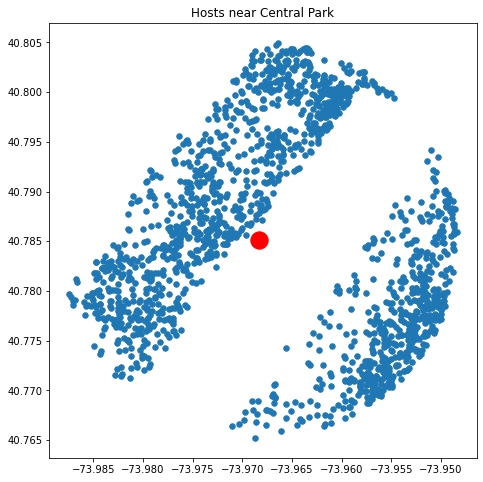

In [91]:
# Покажем местоположение всех подходящих вариантов размещения по первому критерию: 
#не дальше двух километров от Центарального рарка
fig,ax = plt.subplots(1,1, figsize=(8,8))
hosts_2km.plot(markersize = 30, ax = ax)
central_park.plot(markersize=300,color='red',ax=ax)
plt.title("Hosts near Central Park")

In [92]:
hosts_2km.head(5)

,index,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price_range,neighbourhood_group_num,neighbourhood_num,room_type_num,geometry,index_right
7,10,5295,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,1,6,Expensive,1,1,1,POINT (-73.965 40.803),0
10,13,6021,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,1,333,Average,1,1,0,POINT (-73.961 40.798),0
37,43,12318,16800,Cyn,Manhattan,Upper West Side,40.79009,-73.97927,Private room,135,4,81,1,273,Expensive,1,1,0,POINT (-73.979 40.790),0
44,51,14287,56094,Joya,Manhattan,Upper West Side,40.78635,-73.97008,Entire home/apt,151,2,73,1,302,Expensive,1,1,1,POINT (-73.970 40.786),0
86,96,21456,42032,Dana,Manhattan,Upper West Side,40.79764,-73.96177,Entire home/apt,140,3,81,1,198,Expensive,1,1,1,POINT (-73.962 40.798),0


In [93]:
#Далее применяем остальные критерии для поиска идеального варианта размещения:
#стоимость размещения не дороже 145 $
hosts_2cr = hosts_2km.query('price < 145')
len(hosts_2cr)

745

In [94]:
#3 критерий. Минимальное кол-во ночей на которое можно забронировать размещение должно быть меньше 5
hosts_3cr = hosts_2cr.query('minimum_nights < 5')
len(hosts_3cr)

410

In [95]:
# 4 критерий. Кол-во отзывов по объекту размещения должно быть больше 10 
hosts_4cr = hosts_3cr.query('number_of_reviews > 10')
len(hosts_4cr)

291

In [96]:
#5 критерий. Размещение в типах комнат Entire home/apt или Private room
hosts_5cr = hosts_4cr.query('room_type == "Entire home/apt"')
len(hosts_5cr)

66

После того, как применили 5 критериев из 6, на выбор осталось 66 объектов для размещения. 
Выбирем те, объекты, которые ближе всего расположены к станциям метро (около 200 метров)



In [97]:
subways.crs = {'init' :'epsg:2263'}
subways_buff = subways.buffer(.001 * 2)



/Users/dashalobik/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [98]:
subways_buff = gpd.GeoDataFrame({'geometry': subways_buff})
subways_buff.crs = {'init' :'epsg:2263'}

In [99]:
hosts_5cr =hosts_5cr.rename(columns={'index_right': 'other_name'})

In [100]:
ideal_hosts = gpd.sjoin(hosts_5cr,subways_buff, how='inner', predicate ='intersects')
len(ideal_hosts)

13

**Идеальные варианты размещения в городе Нью-Йорк**

Результом исследования является заключельный датасет с 13 объектами размещания, которые подходят по всем заданным критериям. 
Осталось просмотреть фотографии и забронировать номер

In [101]:
ideal_hosts[['host_id', 'host_name', 'neighbourhood', 'price', 'number_of_reviews']]


,host_id,host_name,neighbourhood,price,number_of_reviews
86,42032,Dana,Upper West Side,140,81
242,317809,Claire,Upper West Side,115,210
3246,8658146,Michelle,Upper West Side,120,214
852,2216673,Joy,Upper West Side,90,22
981,2630351,Dawn,Upper West Side,102,36
18375,22309598,Ai,Upper West Side,119,12
2189,8362282,Drica 2017,Upper West Side,125,15
2524,4259154,Christine,Upper West Side,130,87
7177,49903913,Lily,Upper West Side,90,171
24758,244008816,David,Upper West Side,120,19


Все подходящие варианты размещения оказались предложениями от частных лиц. Можем сделать предположение, что номера в отелях стоят дороже, чем квартиры/дома в объявлениях частных лиц.
11 из 13 объектов расположены в районе Верхний Вест Сайд. Стоимость идеального объекта размещения от 90 до 140 долларов
